In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Subconjuntos de train y test

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

#Dividimos el dataset en los cuatro habituales respetando la proporción de valores en la variable Outcome gracias al parámetro stratify
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,10)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):

  print("Round: k="+ str(k))

  knn = KNeighborsClassifier(n_neighbors=k)

  knn.fit(X_train, y_train) #train

  train_accuracy[i] = knn.score(X_train, y_train)

  test_accuracy[i] = knn.score(X_test,y_test)

Round: k=1
Round: k=2
Round: k=3
Round: k=4
Round: k=5
Round: k=6
Round: k=7
Round: k=8
Round: k=9


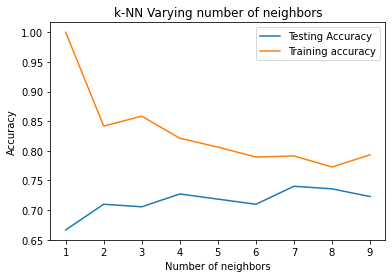

In [13]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Gracias a esta gráfica lo que observamos es que k=7 es el mejor número de vecinos. Esto es porque el accuracy de test es alto y el de train también. Necesitamos un accuracy alto en test para saber que el modelo generaliza bien. 

In [14]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test)) 
y_pred = knn.predict(X_test)


0.7402597402597403




*   y_test contiene los verdaderos valores de las instancias de test
*   y_pred es la predicción del algoritmo KNN




Matriz de confusión con Pandas

In [15]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,129,21,150
1,39,42,81
All,168,63,231


SKlearn nos ofrece una forma de calcular todas las métricas que nos interesan 

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



ROC curve

In [17]:
from sklearn.metrics import roc_curve

y_pred_probabilistic = knn.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probabilistic)

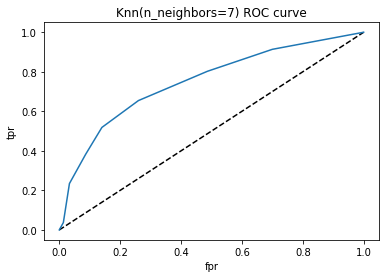

In [18]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [21]:
#Area under the curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_probabilistic)

0.7490123456790124

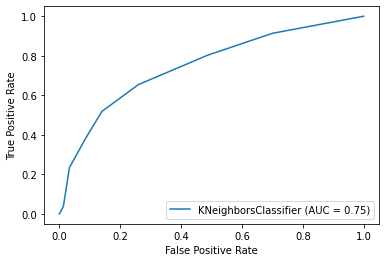

In [19]:
from sklearn import metrics

metrics.plot_roc_curve(knn, X_test, y_test)  
plt.show()   